# ImageFolder 사용하기

 torchvision의 dataset library 아래에는 여러개의 image dataset들이 있다. 
 
 MNIST, Fashion MNIST, CIFAR10, CIFAR 100...
 
 또한 이 library에는 ImageFolder라는 게 있는데... 이 것은 내 이미지를 이곳에 담아서 분석할 수 있도록 도와수는 library라고 생각하면 된다. 
 
 이번에는 ImageFolder에 파일들을 담아서 분석하는 방법을 공부해보다. 
 
 이미지를 import 하고 ImageFolder에 담기 위해서는 
 
 torchvision과 이미지들을 분석에 알맞게 변환할 수 있는 torchvision의 transforms library가 필요하며, 변환된 이미지 파일들을 분석에 이용할 모델로 이동시켜주는 torch.utils.data의 DataLoader가 필요하다. 
 
 부수적으로 zip file을 unzip하고 분석 환경에서 directory를 다룰 zipfile, os library를 loading 한다. 

In [0]:
import torchvision
from torchvision import transforms 

import os 
import zipfile

## File Loading

말과  사람을 분류하는 문제를 풀어보자. 

Coursera의 TensorFlow 과정에서 이용했던 파일을 PyTorch를 이용해서 분석해보면 이 두 package가 어떻게 다른지도 알 수 있을 것이다. 

### Training data

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip 

--2019-07-06 09:46:44--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   194MB/s    in 0.7s    

2019-07-06 09:46:45 (194 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



### Test data

In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2019-07-06 09:47:28--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  --.-KB/s    in 0.1s    

2019-07-06 09:47:28 (89.7 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



### Unzip the files 

Zip file 안의 data 들을 unzip

In [0]:
# local zip file의 위치를 지정
local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

## Manage the image folder into trainable form

In [0]:
train_data = torchvision.datasets.ImageFolder(root='/tmp/horse-or-human', transform=None)

In [7]:
for num, value in enumerate(train_data):
  data, label = value
  print(num, data, label)

0 <PIL.Image.Image image mode=RGB size=300x300 at 0x7FE01B0944E0> 0
1 <PIL.Image.Image image mode=RGB size=300x300 at 0x7FDFCE0AEEB8> 0
2 <PIL.Image.Image image mode=RGB size=300x300 at 0x7FDFCE0AEEF0> 0
3 <PIL.Image.Image image mode=RGB size=300x300 at 0x7FDFCE0C0128> 0
4 <PIL.Image.Image image mode=RGB size=300x300 at 0x7FDFCE0AEFD0> 0
5 <PIL.Image.Image image mode=RGB size=300x300 at 0x7FDFCE0C01D0> 0
6 <PIL.Image.Image image mode=RGB size=300x300 at 0x7FDFCE0C02B0> 0
7 <PIL.Image.Image image mode=RGB size=300x300 at 0x7FDFCE0C0240> 0
8 <PIL.Image.Image image mode=RGB size=300x300 at 0x7FDFCE0C0358> 0
9 <PIL.Image.Image image mode=RGB size=300x300 at 0x7FDFCE0C0438> 0
10 <PIL.Image.Image image mode=RGB size=300x300 at 0x7FDFCE0C0400> 0
11 <PIL.Image.Image image mode=RGB size=300x300 at 0x7FDFCE0C03C8> 0
12 <PIL.Image.Image image mode=RGB size=300x300 at 0x7FDFCE0C02E8> 0
13 <PIL.Image.Image image mode=RGB size=300x300 at 0x7FDFCE0C05C0> 0
14 <PIL.Image.Image image mode=RGB size=300x

Image file은 300x300 크기인데, 우리는 224 x 224 크기로 분석을 원하니까, resize를 할 필요가 있음 

In [0]:
trans = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

In [0]:
train_data = torchvision.datasets.ImageFolder(root='/tmp/horse-or-human', transform=trans)
test_data = torchvision.datasets.ImageFolder(root='/tmp/validation-horse-or-human', transform=trans)

In [10]:
for num, value in enumerate(train_data):
  data, label = value
  print(num, data, label)

0 tensor([[[0.4471, 0.4431, 0.4431,  ..., 0.9529, 0.9490, 0.9529],
         [0.4471, 0.4431, 0.4471,  ..., 0.9529, 0.9451, 0.9333],
         [0.4471, 0.4471, 0.4471,  ..., 0.9569, 0.9412, 0.9137],
         ...,
         [0.8235, 0.8392, 0.8627,  ..., 0.9882, 1.0000, 0.9922],
         [0.8235, 0.8431, 0.8706,  ..., 0.9765, 0.9882, 0.9804],
         [0.8157, 0.8510, 0.8588,  ..., 0.9961, 0.9804, 0.9686]],

        [[0.6196, 0.6196, 0.6196,  ..., 1.0000, 1.0000, 1.0000],
         [0.6235, 0.6235, 0.6235,  ..., 1.0000, 0.9961, 0.9882],
         [0.6275, 0.6235, 0.6235,  ..., 1.0000, 0.9961, 0.9765],
         ...,
         [0.7137, 0.7255, 0.7451,  ..., 0.8784, 0.8980, 0.8706],
         [0.7176, 0.7294, 0.7529,  ..., 0.8510, 0.8588, 0.8510],
         [0.7059, 0.7373, 0.7373,  ..., 0.8667, 0.8392, 0.8314]],

        [[0.8784, 0.8745, 0.8745,  ..., 1.0000, 1.0000, 1.0000],
         [0.8784, 0.8784, 0.8824,  ..., 1.0000, 1.0000, 1.0000],
         [0.8824, 0.8824, 0.8824,  ..., 1.0000, 1.0000, 

## Now! Make a model!

이제 간단한 CNN을 만들어서 학습해보자.

----------------
- input (3x224x224)
-----------------
- layer 1 Conv layer = (in_c=3, out_c=6, kernel_size=5, stride=1) : (224-5)/1 + 1 = 220
- layer 1 MaxPool layer = (kernel_size=2, stride 2) : 220 -> 110
-----------------
- layer 2 Conv layer = (in_c=6, out_c=16, kernel_size=5, stride=1) : (110-5)/1 + 1 = 106
- layer 2 MaxPool layer = (kernel_size=2, stride 2) : 106 -> 53
-------------
- layer 3 Conv layer = (in_c=16, out_c=32, kernel_size=5, stride=1) : (53-5)/1 + 1 = 49
- layer 3 MaxPool layer = (kernel_size=2, stride 2) : 50 -> 24
---------------------
- layer 4 View => batch_size x [32, 24, 24] => batch_size x 18,432
- layer 4 FC = (input=18432, output=120)
- layer 4 FC = (input = 120, output = 2)
----------------

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
from torch.utils.data import DataLoader

In [0]:
# Device 지정 
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)
if device == 'cuda':
  torch.cuda.manual_seed(777)

In [0]:
# DataLoader 지정

data_loader = DataLoader(dataset=train_data, batch_size=8, shuffle=True, num_workers=2)

In [0]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.layer1 = nn.Sequential(nn.Conv2d(3, 6, 5),
                               nn.ReLU(),
                               nn.MaxPool2d(2),)
    self.layer2 = nn.Sequential(nn.Conv2d(6, 16, 5),
                               nn.ReLU(),
                               nn.MaxPool2d(2),)
    self.layer3 = nn.Sequential(nn.Conv2d(16, 32, 5),
                               nn.ReLU(),
                               nn.MaxPool2d(2),)
    self.layer4 = nn.Sequential(nn.Linear(32*24*24, 120),
                               nn.ReLU(),
                               nn.Linear(120, 2))
    
  def forward(self, x):
    out = self.layer1(x)
    out = self.layer2(out)
    out = self.layer3(out)
    out = out.view(out.shape[0], -1)
    out = self.layer4(out)
    return out

In [16]:
net = CNN().to(device)
print(net)

CNN(
  (layer1): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer4): Sequential(
    (0): Linear(in_features=18432, out_features=120, bias=True)
    (1): ReLU()
    (2): Linear(in_features=120, out_features=2, bias=True)
  )
)


### Test the model 

In [18]:
test_in = torch.Tensor(3, 3, 224, 224).to(device)
test_out = net(test_in)
print(test_out)

tensor([[-0.0510,  0.0374],
        [-0.0514,  0.0366],
        [-0.0514,  0.0366]], grad_fn=<AddmmBackward>)


## Let's Train

In [0]:
criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(net.parameters(), lr=0.0001)

In [0]:
total_batch = len(train_data)
epochs = 15

In [0]:
hist_epoch = []
hist_loss = []

In [45]:
for epoch in range(epochs):
  avg_cost=0
  
  for num, data in enumerate(data_loader):
    imgs, labels = data
    imgs = imgs.to(device)
    labels = labels.to(device)
    
    optimizer.zero_grad()
    out = net(imgs)
    loss = criterion(out, labels)
    loss.backward()
    optimizer.step
    
    avg_cost += loss/total_batch
  
  print('[Epoch {}] Cost={}'.format(epoch+1, avg_cost))
  hist_epoch.append(epoch+1)
  hist_loss.append(avg_cost)
  
print('Learning_Finished')

[Epoch 1] Cost=0.08707938343286514
[Epoch 2] Cost=0.08706406503915787
[Epoch 3] Cost=0.08706294745206833
[Epoch 4] Cost=0.08706390112638474
[Epoch 5] Cost=0.0870804637670517
[Epoch 6] Cost=0.08706381916999817
[Epoch 7] Cost=0.08706305921077728
[Epoch 8] Cost=0.08709561824798584
[Epoch 9] Cost=0.08708086609840393
[Epoch 10] Cost=0.08704736083745956
[Epoch 11] Cost=0.08707769215106964
[Epoch 12] Cost=0.08707883954048157
[Epoch 13] Cost=0.08707873523235321
[Epoch 14] Cost=0.08709412813186646
[Epoch 15] Cost=0.08706449717283249
Learning_Finished


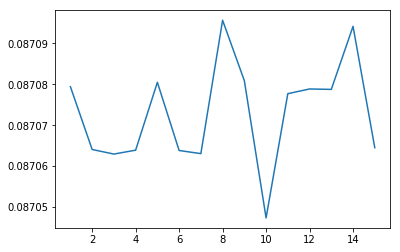

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(hist_epoch, hist_loss)

### View the weights of layer1

In [58]:
net.layer1[0].weight[0]


tensor([[[-0.0966, -0.0020, -0.0223, -0.0263,  0.0881],
         [ 0.0880,  0.0518,  0.0008,  0.0750, -0.0546],
         [-0.0436,  0.0219, -0.0903,  0.0280,  0.0543],
         [ 0.1131,  0.0962, -0.0405,  0.0858,  0.0895],
         [ 0.0932, -0.0646, -0.0232, -0.0617,  0.1019]],

        [[ 0.0965,  0.0913, -0.0152, -0.0803, -0.0426],
         [-0.0284,  0.0269,  0.0082,  0.1148, -0.0282],
         [ 0.1049,  0.0758,  0.0337,  0.0126, -0.0300],
         [-0.0994, -0.0261,  0.0530,  0.0939, -0.1141],
         [-0.1097, -0.0116, -0.0659, -0.0247,  0.0031]],

        [[ 0.1152, -0.0808, -0.0419,  0.0933,  0.0689],
         [ 0.0816, -0.1011,  0.0352,  0.1154,  0.0099],
         [ 0.0451, -0.0929, -0.0426, -0.0759,  0.0543],
         [ 0.1012,  0.0453, -0.0967, -0.0344,  0.0204],
         [-0.0214, -0.0546, -0.0765, -0.1059, -0.0355]]],
       grad_fn=<SelectBackward>)

## Test the model with test_set

In [0]:
test_set = DataLoader(dataset=test_data, batch_size=len(test_data)) 

In [61]:
with torch.no_grad():
  for num, data in enumerate(test_set):
    imgs, labels = data
    imgs = imgs.to(device)
    labels = labels.to(device)
    
    prediction = net(imgs)
    
    correct_prediction = torch.argmax(prediction, 1) == labels
    
    accuracy = correct_prediction.float().mean()
    
  print('Accuracy: ', accuracy.item())

Accuracy:  0.5


In [0]:
torch.hub.